**importing the required libraries**

In [105]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import os

# **Player wise**

## **Getting the input from the user and parsing the content**

In [106]:
player_id = str(input("Please, Enter player id: "))
try:
    url = 'https://understat.com/player/'+ player_id
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    player_name = soup.find_all('div',{"class":"header-wrapper"})
    player_name = player_name[0].text.strip()
    print(player_name, ':\t', url)
except:
    print('Player not found')

Mohamed Salah :	 https://understat.com/player/1250


In [107]:
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

In [108]:
for root,dirs,files in os.walk(r"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\Players"):
    for file in files:
        try:
            if file.startswith(f'{player_name}'):
                print(os.path.join(root,file))
                PlayerPhoto = os.path.join(root,file)
                
        except:
            print('Photo not found')
            break

C:\Users\YahyaRashwan\Desktop\DataVizMaterial\Players\Mohamed Salah.png


In [109]:
team = soup.find_all('a')[4].text

for root,dirs,files in os.walk(r"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges"):
    for file in files:
        try:
            if file.startswith(f'{team}'):
                print(os.path.join(root,file))
                TeamLogo_ = os.path.join(root,file)

        except:
            print('Photo not found')
            break       

C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\Liverpool.png


## **Summary data for every single match**

In [110]:
def GetMatchesData():
    
    '''This function gets the matches data from the json file.'''

    strings = scripts[4].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    goals=[]
    shots=[]
    xg=[]
    time_played=[]
    postion=[]
    h_team=[]
    a_team=[]
    season=[]
    dates = []
    xA = []
    assists = []
    key_passes = []
    npg = []
    npxG = []
    xGChain = []
    xGBuildup = []
    
    for i in range(len(json_data)):
        goals.append((json_data[i]['goals']))
        shots.append((json_data[i]['shots']))
        xg.append(json_data[i]['xG'])
        time_played.append(json_data[i]['time'])
        postion.append(json_data[i]['position'])
        h_team.append(json_data[i]['h_team'])
        a_team.append(json_data[i]['a_team'])
        season.append(json_data[i]['season'])
        dates.append(json_data[i]['date'])
        xA.append(json_data[i]['xA'])
        assists.append((json_data[i]['assists']))
        key_passes.append(json_data[i]['key_passes'])
        npg.append(json_data[i]['npg'])
        npxG.append(json_data[i]['npxG'])
        xGChain.append(json_data[i]['xGChain'])
        xGBuildup.append(json_data[i]['xGBuildup'])

    df = pd.DataFrame({'Position':postion, 'Home team':h_team, 'Away team':a_team, 'Season':season,
                                'Date':dates,'goals Scored':goals,'Non-penalty goals':npg,'Assists':assists,
                                 'shots':shots,'Key passes':key_passes,'Time played':time_played, 'xG':xg,
                                   'xA':xA,'Non-penalty xG':npxG,'xG Chain':xGChain, 'xG Buildup':xGBuildup})

    for col in list(df.columns)[11:]:
        df[col] = df[col].astype(float).round(3)
    
    for col in list(df.columns)[5:11]:
        df[col] = df[col].astype(int)
    
    #df.to_csv(f'{player_name}_matches_data.csv')
    return df

x = GetMatchesData()
display(x)

,Position,Home team,Away team,Season,Date,goals Scored,Non-penalty goals,Assists,shots,Key passes,Time played,xG,xA,Non-penalty xG,xG Chain,xG Buildup
0,FWR,Manchester United,Liverpool,2022,2022-08-22,1,1,0,3,4,90,0.150,0.232,0.150,0.890,0.606
1,FWR,Liverpool,Crystal Palace,2022,2022-08-15,0,0,0,3,8,90,0.537,0.452,0.537,0.988,0.064
2,FWR,Fulham,Liverpool,2022,2022-08-06,1,1,0,2,1,90,0.392,0.534,0.392,1.104,0.712
3,Sub,Liverpool,Wolverhampton Wanderers,2021,2022-05-22,1,1,0,8,0,27,1.167,0.000,1.167,0.564,0.088
4,Sub,Aston Villa,Liverpool,2021,2022-05-10,0,0,0,1,1,15,0.128,0.069,0.128,0.196,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,FWL,Sassuolo,Fiorentina,2014,2015-02-14,1,1,1,3,2,82,0.459,0.224,0.459,0.705,0.022
263,Sub,Fiorentina,Atalanta,2014,2015-02-08,0,0,0,1,3,24,0.097,0.271,0.097,0.273,0.097
264,Sub,Tottenham,Chelsea,2014,2015-01-01,0,0,0,1,1,15,0.440,0.026,0.440,0.483,0.017
265,Sub,Crystal Palace,Chelsea,2014,2014-10-18,0,0,0,0,0,2,0.000,0.000,0.000,0.000,0.000


## **Season Stats**

In [111]:
def playerSeasonStats(get_matches_data):
    
    '''This function gets the player season stats.'''

    df = get_matches_data
    season = input("Please, Enter season: ")
    try:
        df = df.loc[(df['Season'] == season )].reset_index(drop=True)
        print(f"{player_name} stats in {int(season)}/{int(season)+1} season:")
        print("*   {} minutes in {} matches ".format((df['Time played'].sum()),len(df['Time played'])))
        print("*   {} Goals and {} assists ".format((df['goals Scored'].sum()),int(df['Assists'].sum())))
        print("*   {} XG and {} XA ".format(df['xG'].sum().round(3),df['xA'].sum().round(3)))
        print("*   {} Shots ".format(int(df['shots'].sum())))
        print("*   {} Key passes ".format(int(df['Key passes'].sum())))
    except:
        print("Season not found, please try again.")

playerSeasonStats(get_matches_data=x)

Mohamed Salah stats in 2021/2022 season:
*   2757 minutes in 35 matches 
*   23 Goals and 13 assists 
*   24.365 XG and 9.793 XA 
*   139 Shots 
*   62 Key passes 


## **Career Stats**

In [112]:
def CareerStats():
    
    '''This function gets the player career stats.'''

    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    games = [int(x["games"]) for x in json_data["season"]]
    mins = [int(x['time']) for x in json_data["season"]]
    goals = [int(x["goals"])for x in json_data["season"]]
    shots = [int(x["shots"])for x in json_data["season"]]
    xg = [float(x["xG"])for x in json_data["season"]]
    assists = [int(x["assists"])for x in json_data["season"]]
    xa = [float(x["xA"])for x in json_data["season"]]
    season = [x["season"] for x in json_data["season"]]
    team = [x["team"]for x in json_data["season"]]
    yellow = [int(x["yellow"]) for x in json_data["season"]]
    red = [x["red"] for x in json_data["season"]]
    np_g = [x["npg"] for x in json_data["season"]]
    np_xg = [x["npxG"] for x in json_data["season"]]
    xg_chain = [x["xGChain"] for x in json_data["season"]]
    xg_buildup = [x["xGBuildup"] for x in json_data["season"]]

    df = pd.DataFrame({ 'Season': season, 'Team': team, 'Mins': mins,'App.': games,
                    'Goals': goals, 'Shots': shots, 'xG': xg, 'Assists': assists, 
                'xA': xa, 'Yellow cards': yellow, 'Red cards': red, 'npG': np_g,
                    'npxG': np_xg, 'xGChain': xg_chain, 'xGBuildup': xg_buildup})

    for col in ["xG","xA",'npxG','xGChain','xGBuildup']:
        df[col] = df[col].astype(float).round(3)

    df['Season'] = df['Season'].astype(int)

    df = df.sort_values(by=['Season'])
    #df.to_csv(f"{player_name}_CareerStats.csv")
    display(df.reset_index(drop=True))

CareerStats()

,Season,Team,Mins,App.,Goals,Shots,xG,Assists,xA,Yellow cards,Red cards,npG,npxG,xGChain,xGBuildup
0,2014,Fiorentina,909,16,6,29,3.815,3,1.936,0,0,6,3.815,7.405,2.628
1,2014,Chelsea,23,3,0,2,0.502,0,0.026,0,0,0,0.502,0.545,0.017
2,2015,Roma,2753,34,14,72,9.377,6,7.069,1,1,14,9.377,23.043,10.797
3,2016,Roma,2498,31,15,80,13.412,11,9.634,2,0,15,13.412,29.467,9.300
4,2017,Liverpool,2954,36,32,143,25.137,10,8.344,1,0,31,23.614,35.301,5.899
5,2018,Liverpool,3274,38,22,137,21.792,8,10.469,1,0,19,19.509,31.780,7.866
6,2019,Liverpool,2904,34,19,132,20.663,10,8.726,1,0,16,18.380,31.374,8.425
7,2020,Liverpool,3085,37,22,126,20.251,5,6.529,0,0,16,15.684,28.968,9.800
8,2021,Liverpool,2757,35,23,139,24.364,13,9.791,1,0,18,19.797,32.159,11.222
9,2022,Liverpool,270,3,2,8,1.079,0,1.218,0,0,2,1.079,2.982,1.382


## **Shots (X,Y) Data**


In [113]:
def TabularShotsData():

    """This function gets the player shots data."""
    
    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    X = [float((json_data[i]['X'])) for i in range(len(json_data))]
    Y = [float((json_data[i]['Y'])) for i in range(len(json_data))]
    xg = [float((json_data[i]['xG'])) for i in range(len(json_data))]
    result = [json_data[i]['result'] for i in range(len(json_data))]
    min = [int((json_data[i]['minute'])) for i in range(len(json_data))]
    Assisted_by = [json_data[i]['player_assisted'] for i in range(len(json_data))]
    home_team = [json_data[i]['h_team'] for i in range(len(json_data))]
    away_team = [json_data[i]['a_team'] for i in range(len(json_data))]
    last_action = [json_data[i]['lastAction'] for i in range(len(json_data))]
    situations = [json_data[i]['situation'] for i in range(len(json_data))]
    seasons =  [int(json_data[i]['season']) for i in range(len(json_data))]
    shot_type = [json_data[i]['shotType'] for i in range(len(json_data))]

    df = pd.DataFrame({'Season':seasons,'Home team':home_team, 'Away team':away_team,'X':X, 'Y':Y,
                    'xG':xg, 'Output':result, 'Minute':min,'Assisted by':Assisted_by, 'Assist type':last_action,
                                                                  'Situation':situations,'Shot type':shot_type})
    for i in range(len(df)):
        df['X'][i] = df['X'][i]*120 - 0.3
        df['Y'][i] = df['Y'][i]*80
    
    for i in ['X','Y','xG']:
        df[i] = df[i].astype(float).round(3)

    df.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)

    df['Assist type'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

    df['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

    df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                            ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)
    
    df['Time Tier'] = 0

    for i in range(len(df)):
        if df['Minute'][i] < 15:
            df['Time Tier'][i] = '0 - 15 minutes'
        elif df['Minute'][i] < 30:
            df['Time Tier'][i] = '15 - 30 minutes'
        elif df['Minute'][i] < 45:
            df['Time Tier'][i] = '30 - 45 minutes'
        elif df['Minute'][i] < 60:
            df['Time Tier'][i] = '45 - 60 minutes'
        elif df['Minute'][i] < 75:
            df['Time Tier'][i] = '60 - 75 minutes'
        elif df['Minute'][i] < 120:
            df['Time Tier'][i] = 'Last 15 minutes'

    df ['xG Tier'] = 0

    for i in range(len(df)):
        if df['xG'][i] < 0.06:
            df['xG Tier'][i] = 'Poor xG'
        elif df['xG'][i] < 0.15:
            df['xG Tier'][i] = 'Average xG'
        elif df['xG'][i] < 0.33:
            df['xG Tier'][i] = 'Good xG'
        else:
            df['xG Tier'][i] = 'Great xG'
    
    df['Assisted by'].fillna('Individual',inplace=True)

    df.to_csv(f"{player_name}_shots_map.csv") 
    display(df)

TabularShotsData()

,Season,Home team,Away team,X,Y,xG,Output,Minute,Assisted by,Assist type,Situation,Shot type,Time Tier,xG Tier
0,2014,Chelsea,Swansea,98.46,29.52,0.062,Missed Shot,92,Eden Hazard,Pass,Open Play,Left Foot,Last 15 minutes,Average xG
1,2014,Tottenham,Chelsea,110.10,42.56,0.440,Saved Shot,84,Eden Hazard,Pass,Open Play,Left Foot,Last 15 minutes,Great xG
2,2014,Fiorentina,Atalanta,106.02,45.28,0.097,Blocked Shot,87,Mario Gomez,Ball Touch,Open Play,Left Foot,Last 15 minutes,Average xG
3,2014,Sassuolo,Fiorentina,115.38,55.04,0.049,Saved Shot,0,David Pizarro,Chipped,Open Play,Left Foot,0 - 15 minutes,Poor xG
4,2014,Sassuolo,Fiorentina,107.70,54.16,0.060,Missed Shot,16,Khouma Babacar,Pass,Open Play,Left Foot,15 - 30 minutes,Average xG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2022,Liverpool,Crystal Palace,110.22,37.04,0.400,Saved Shot,29,Trent Alexander-Arnold,Through ball,Open Play,Head,15 - 30 minutes,Great xG
864,2022,Liverpool,Crystal Palace,97.86,41.52,0.045,Missed Shot,86,Individual,Rebound,Open Play,Left Foot,Last 15 minutes,Poor xG
865,2022,Manchester United,Liverpool,103.50,33.52,0.070,Blocked Shot,39,Roberto Firmino,Pass,Open Play,Left Foot,30 - 45 minutes,Average xG
866,2022,Manchester United,Liverpool,101.70,48.96,0.037,Missed Shot,48,Trent Alexander-Arnold,Cross,From Corner,Left Foot,45 - 60 minutes,Poor xG


## **Time Tier**

In [114]:
def TimeTier():
    df = pd.read_csv(f'{player_name}_shots_map.csv')
    display(df.groupby(['Time Tier']).agg({'Output':'count'})['Output'])
        
TimeTier()

Time Tier
0 - 15 minutes     117
15 - 30 minutes    136
30 - 45 minutes    132
45 - 60 minutes    181
60 - 75 minutes    141
Last 15 minutes    161
Name: Output, dtype: int64

## **Shot Zones**

In [115]:
def ShotsArea():

    shotzone = []
    season = []
    g = []
    sh = []
    xg = []
    assists = []
    kp = []
    xa = []
    npg = []
    npxg = []

    for year in list(json_data['shotZones'].keys()):
        for type in json_data['shotZones'][year].keys():
            for param in json_data['shotZones'][year][type].keys():
                if param == "shotZones":
                    shotzone.append(json_data['shotZones'][year][type][param])
                elif param == "season":
                    season.append(json_data['shotZones'][year][type][param])
                elif param == "goals":
                    g.append(json_data['shotZones'][year][type][param])
                elif param == "shots":
                    sh.append(json_data['shotZones'][year][type][param])
                elif param == "xG":
                    xg.append(json_data['shotZones'][year][type][param])
                elif param == "assists":
                    assists.append(json_data['shotZones'][year][type][param])
                elif param == "key_passes":
                    kp.append(json_data['shotZones'][year][type][param])
                elif param == "xA":
                    xa.append(json_data['shotZones'][year][type][param])
                elif param == "npg":
                    npg.append(json_data['shotZones'][year][type][param])
                elif param == "npxG":
                    npxg.append(json_data['shotZones'][year][type][param])

    df = pd.DataFrame({"Shot Zone":shotzone,"Season":season,"Goals":g,"Shots":sh,"xG":xg,"Assists":assists,"Key Passes":kp,"xA":xa,"npg":npg,"npxG":npxg})
    df['Shot Zone'].replace(["shotPenaltyArea","shotOboxTotal",'shotSixYardBox'],["Penalty Area",'Outside the box','Six Yard Box'],inplace=True)

    for x in ["xG","xA","npxG"]:
        df[x] = df[x].astype(float).round(3)

    for x in ["Goals","Shots","Assists","Key Passes","npg"]:
        df[x] = df[x].astype(int)
        
    display(df.groupby(["Season",'Shot Zone']).agg({"Goals": "sum", "Shots": "sum", "Assists": "sum", "Key Passes": "sum", "xG": "sum", "xA": "sum", "npg": "sum", "npxG": "sum"}))
    #df.to_csv(f'{player_name}_Shot_Zones.csv')

ShotsArea()

Goals  Shots  Assists  Key Passes      xG     xA  npg  \
Season Shot Zone                                                                
2014   Outside the box      0      8        1          17   0.367  0.725    0   
       Penalty Area         6     22        2          13   3.790  1.128    6   
       Six Yard Box         0      1        0           1   0.161  0.109    0   
2015   Outside the box      3     24        2          30   0.751  0.765    3   
       Penalty Area        10     46        2          29   7.716  3.959   10   
       Six Yard Box         1      2        2           4   0.910  2.345    1   
2016   Outside the box      2     19        1          22   1.043  0.999    2   
       Penalty Area         9     48        7          40   7.298  5.362    9   
       Six Yard Box         4     13        3           9   5.071  3.273    4   
2017   Outside the box      3     32        1          23   1.347  0.780    3   
       Penalty Area        25    103        6          33  20.541  6.131   24   
       Six Yard Box         4      8        3           6   3.249  1.434    4   
2018   Outside the box      1     42        0          20   1.777  0.755    1   
       Penalty Area        15     81        7          44  13.300  8.969   12   
       Six Yard Box         6     14        1           4   6.716  0.744    6   
2019   Outside the box      0     22        3          17   1.096  0.818    0   
       Penalty Area        17    101        7          40  15.810  7.276   14   
       Six Yard Box         2      9        0           1   3.757  0.632    2   
2020   Outside the box      2     28        0          19   0.955  0.602    2   
       Penalty Area        18     92        3          31  17.021  4.606   12   
       Six Yard Box         2      6        2           4   2.275  1.320    2   
2021   Outside the box      1     29        2          15   1.372  0.797    1   
       Penalty Area        18    102        7          38  18.203  6.236   13   
       Six Yard Box         4      8        3           6   4.789  2.758    4   
2022   Outside the box      0      1        0           2   0.045  0.038    0   
       Penalty Area         1      6        0          10   0.991  0.646    1   
       Six Yard Box         1      1        0           1   0.043  0.534    1   

                          npxG  
Season Shot Zone                
2014   Outside the box   0.367  
       Penalty Area      3.790  
       Six Yard Box      0.161  
2015   Outside the box   0.751  
       Penalty Area      7.716  
       Six Yard Box      0.910  
2016   Outside the box   1.043  
       Penalty Area      7.298  
       Six Yard Box      5.071  
2017   Outside the box   1.347  
       Penalty Area     19.018  
       Six Yard Box      3.249  
2018   Outside the box   1.777  
       Penalty Area     11.016  
       Six Yard Box      6.716  
2019   Outside the box   1.096  
       Penalty Area     13.527  
       Six Yard Box      3.757  
2020   Outside the box   0.955  
       Penalty Area     12.454  
       Six Yard Box      2.275  
2021   Outside the box   1.372  
       Penalty Area     13.636  
       Six Yard Box      4.789  
2022   Outside the box   0.045  
       Penalty Area      0.991  
       Six Yard Box      0.043

## **Shots Map**

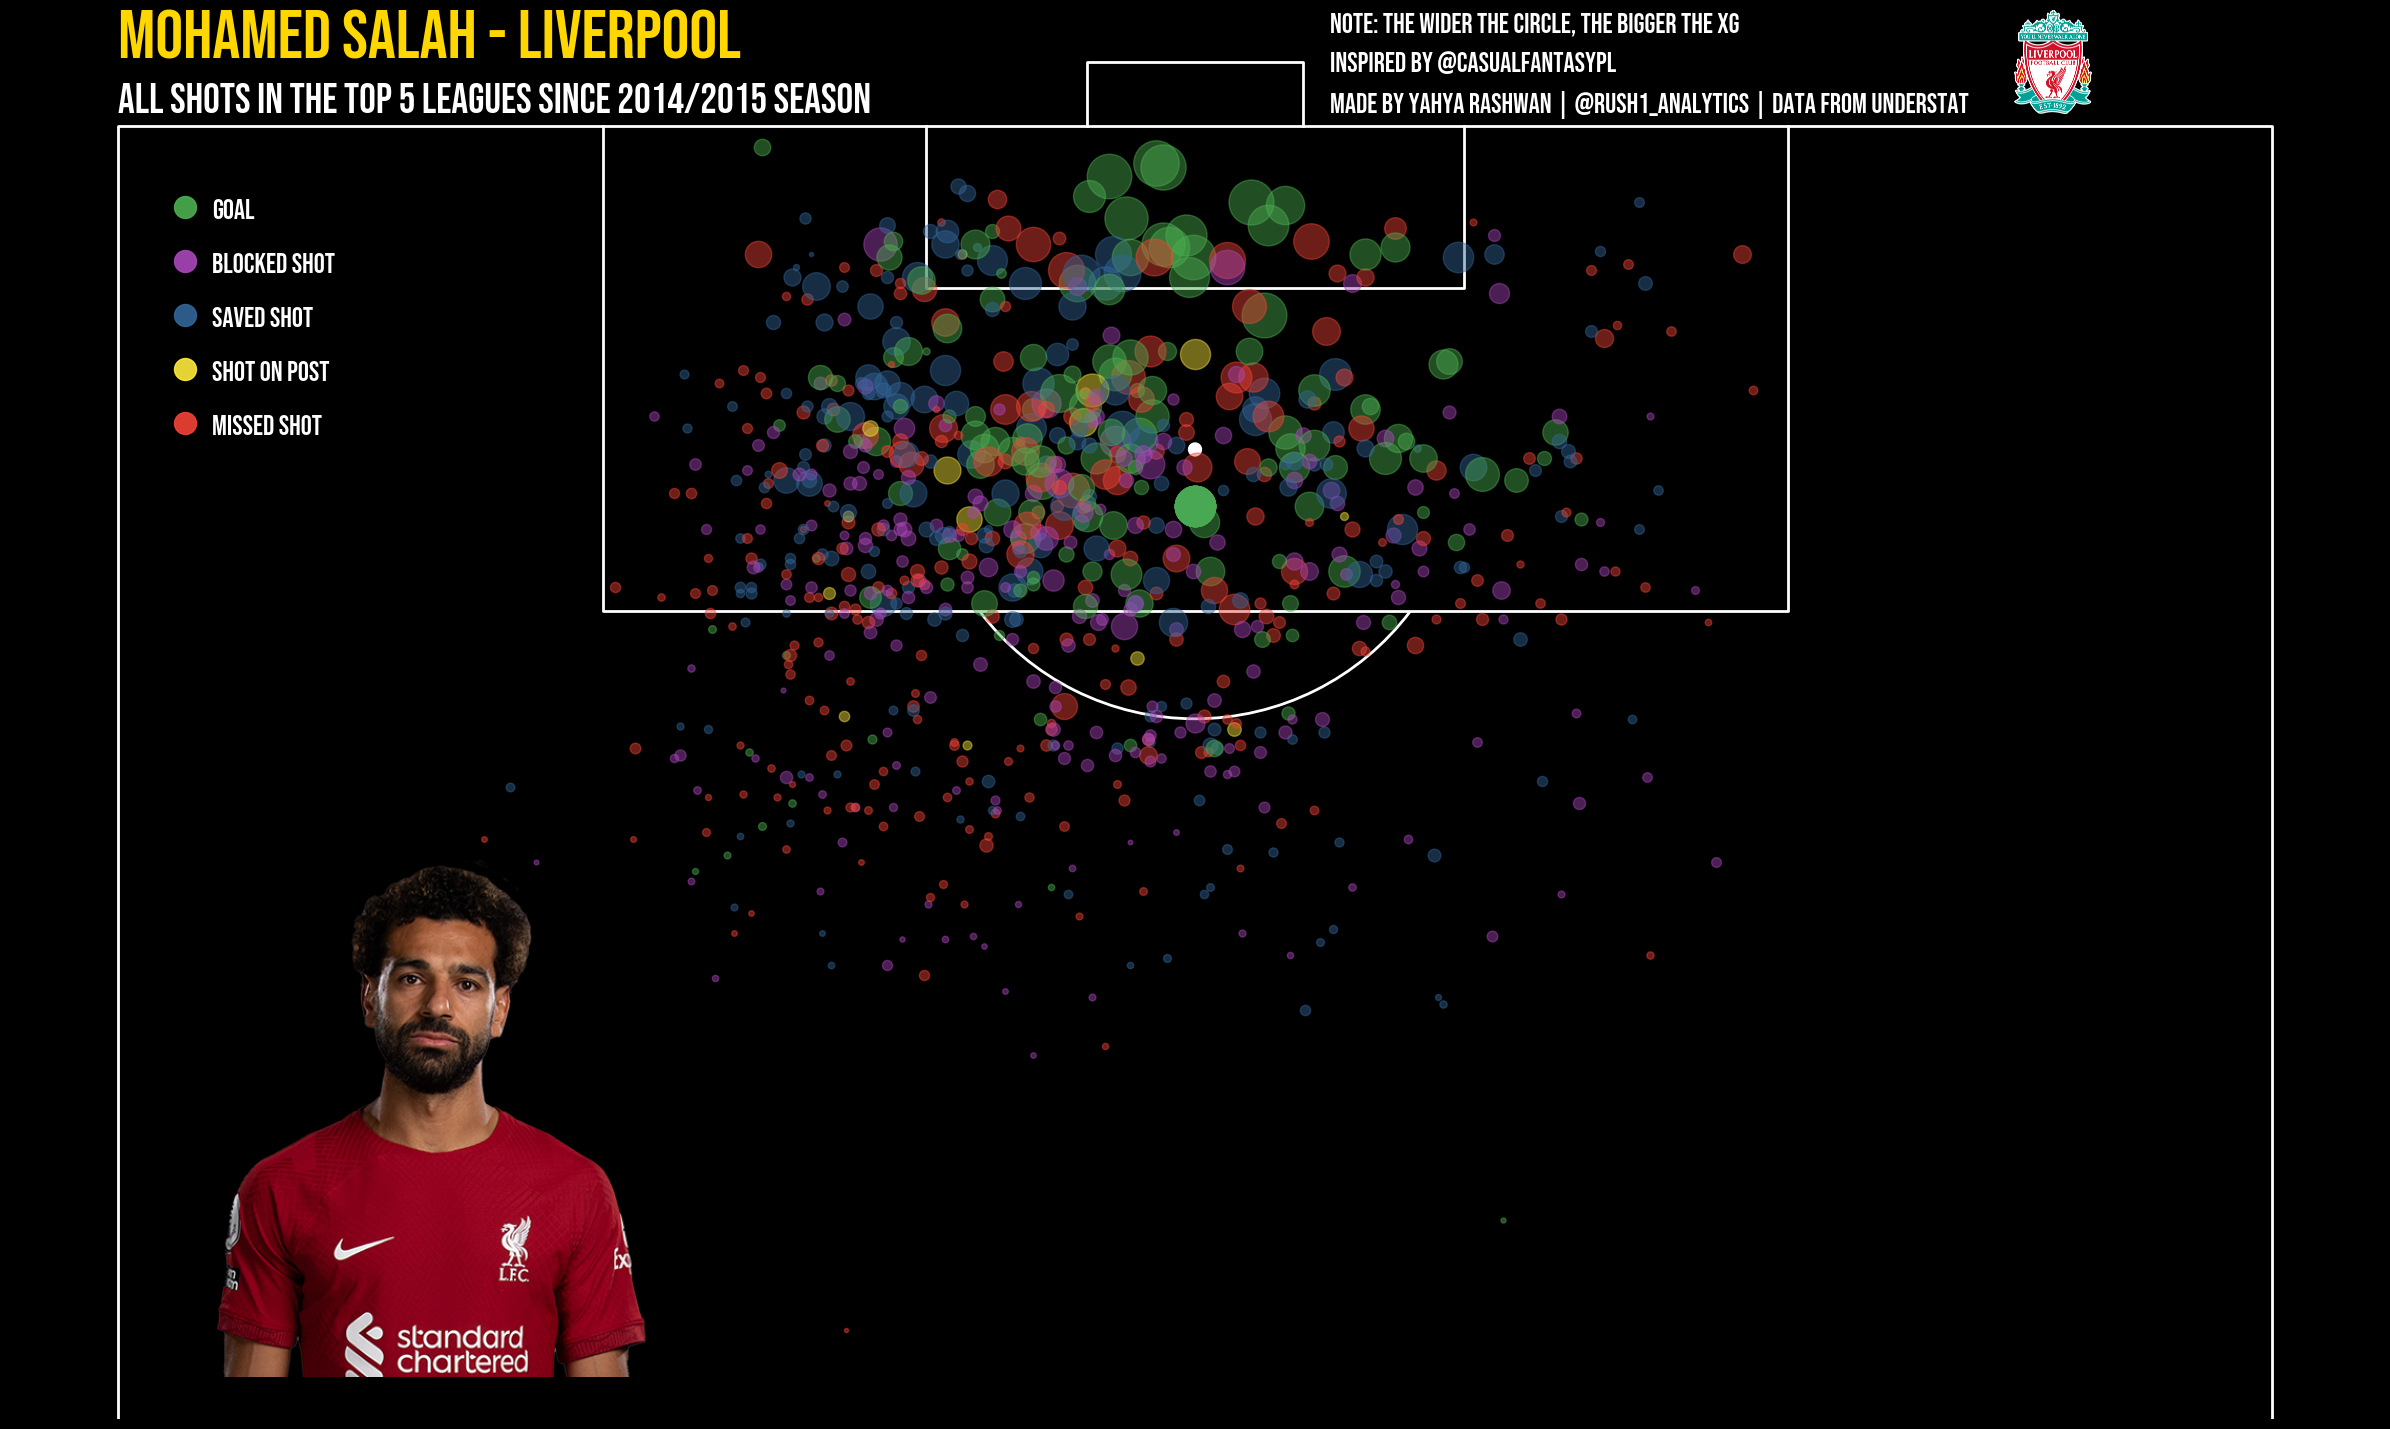

In [116]:
def PlotShots():
    
    from urllib.request import urlopen
    import matplotlib.pyplot as plt
    from PIL import Image
    from mplsoccer import Pitch, add_image
    plt.style.use('dark_background')
    import matplotlib.font_manager as fm

    df = pd.read_csv(f'{player_name}_shots_map.csv')
    
  
    #The statsbomb pitch from mplsoccer
    pitch = VerticalPitch( half=True,goal_type='box',line_color='white',pad_bottom=-12)
    fig, ax = pitch.draw(figsize=(12*2, 2*8))

    path = r"C:\Users\YahyaRashwan\Desktop\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
    fontprop = fm.FontProperties(fname=path, size=50, weight='bold', style='normal', stretch='normal')
    fontprop2 = fm.FontProperties(fname=path, size=15*2, weight='bold', style='normal', stretch='normal')
    fontprop3 = fm.FontProperties(fname=path, size=10*2, weight='bold', style='normal', stretch='normal')

###########################################################################################################

    #plot the points, you can use a for loop to plot the different outcomes if you want
    for i in range(len(df)):
        if df.Output[i] == 'Goal':
            pitch.scatter(ax=ax,x=df['X'][i],y=df['Y'][i],c="#4CAF50",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#4CAF50')
        elif df.Output[i] == 'Blocked Shot':
            pitch.scatter(ax=ax,x=df['X'][i],y=df['Y'][i],c="#AB47BC",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#AB47BC')
        elif df.Output[i] == 'Saved Shot':
            pitch.scatter(ax=ax,x=df['X'][i],y=df['Y'][i],c="#336699",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#336699')
        elif df.Output[i] == 'Shot On Post':
            pitch.scatter(ax=ax,x=df['X'][i],y=df['Y'][i],c="#FFEB3B",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#FFEB3B')
        else:
            pitch.scatter(ax=ax,x=df['X'][i],y=df['Y'][i],s=df['xG'][i]*1100,c='#F44336',alpha=.45,marker='o',edgecolors='#F44336')

    ax.text(0.0045, 122.5,f"{player_name} - {team}" ,c='#FFD700', fontproperties=fontprop)
    ax.text(0.0047, 120.5, 'All shots in the top 5 leagues since 2014/2015 season', fontproperties= fontprop2)

    ax.text(45, 120.5, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontproperties= fontprop3)
    ax.text(45, 122, 'Inspired by @casualfantasypl', fontproperties= fontprop3)
    ax.text(45, 123.5, 'Note: The wider the circle, the bigger the xG', fontproperties= fontprop3)

######################################################################################################

    pitch.scatter(ax=ax,x=117,y=2.5,s=250,c='#4CAF50',alpha=0.9,marker='o',edgecolors='#4CAF50')
    ax.text(3.5, 116.55, 'Goal', fontproperties= fontprop3)

    pitch.scatter(ax=ax,x=115,y=2.5,s=250,c='#AB47BC',alpha=0.9,marker='o',edgecolors='#AB47BC')
    ax.text(3.5, 114.55, 'Blocked Shot', fontproperties= fontprop3)

    pitch.scatter(ax=ax,x=113,y=2.5,s=250,c='#336699',alpha=0.9,marker='o',edgecolors='#336699')
    ax.text(3.5, 112.55, 'Saved Shot', fontproperties= fontprop3)

    pitch.scatter(ax=ax,x=111,y=2.5,s=250,c='#FFEB3B',alpha=0.9,marker='o',edgecolors='#FFEB3B')
    ax.text(3.5, 110.55, 'Shot on post', fontproperties= fontprop3)

    pitch.scatter(ax=ax,x=109,y=2.5,s=250,c='#F44336',alpha=0.9,marker='o',edgecolors='#F44336')
    ax.text(3.5, 108.55, 'Missed shot', fontproperties= fontprop3)

###########################################################################################################

    ax_opta8 = fig.add_axes((0.075, 0.065,0.175*1.25,0.3*1.25))
    ax_opta8.patch.set_facecolor('black')
    ax_opta8.axis('off')
    im = plt.imread(PlayerPhoto)
    ax_opta8.imshow(im)
#############################################################################################################

    ax_opta7 = fig.add_axes((0.825, 0.878,0.065,0.065))
    ax_opta7.patch.set_facecolor('black')
    ax_opta7.axis('off')
    im = plt.imread(TeamLogo_)
    ax_opta7.imshow(im)

    fig.savefig(rf"C:\Users\YahyaRashwan\Desktop\Shots Map\{player_name}.png")

PlotShots()


## **Key passers**

In [117]:
def KeyPassers():
    
    '''This function will display the key passes for each player and store the data in a csv file''' 

    df = pd.read_csv(f'{player_name}_Shots_map.csv',index_col=0)
    df.head()
    df_shot = df.groupby(['Assisted by']).agg({"xG": "sum"}).sort_values(by='xG',ascending=False)

    assist_count = df.groupby(['Assisted by']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    df_goal = df[df['Output'] == 'Goal']
    df_goal = df_goal.groupby(['Assisted by']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    result = pd.concat([assist_count,df_shot,df_goal],axis=1)
    result.columns = ['# Of Key passes','xG','Goals']
    result.fillna(0,inplace=True)

    result['Goals'] = result['Goals'].astype(int)
    result['Goals difference'] = result['Goals'] - result['xG']
    result['Goals difference'] = result['Goals difference'].astype(float)
    result['xG'] = result['xG'].astype(float).round(3)
    result['# Of Key passes'] = result['# Of Key passes'].astype(int)
    result['Success Rate'] = result['Goals'] / result['# Of Key passes']*100
    result['Success Rate'] = result['Success Rate'].astype(float).round(2)
    result['Success Rate'] = result['Success Rate'].astype(str) + '%'
    result.sort_values(by='# Of Key passes',ascending=False,inplace=True)

    #result.to_csv(f'{player_name}_Key_passers.csv',index=False)

    display(result.head(5))

KeyPassers()

,# Of Key passes,xG,Goals,Goals difference,Success Rate
Assisted by,,,,,
Individual,223,47.041,52,4.959,23.32%
Sadio Mané,86,12.461,12,-0.461,13.95%
Roberto Firmino,69,12.280,12,-0.280,17.39%
Trent Alexander-Arnold,66,8.425,6,-2.425,9.09%
Andrew Robertson,39,7.869,8,0.131,20.51%


## **Key Pass Types**

In [118]:
def KeyPassTypes():
    
    '''This function will display the key passes per type, and store the data in a csv file'''

    df = pd.read_csv(f'{player_name}_Shots_map.csv',index_col=0)
    df.head()
    df_shot = df.groupby(['Assist type']).agg({"xG": "sum"}).sort_values(by='xG',ascending=False)

    assist_count = df.groupby(['Assist type']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    df_goal = df[df['Output'] == 'Goal']
    df_goal = df_goal.groupby(['Assist type']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    result = pd.concat([assist_count,df_shot,df_goal],axis=1)
    result.columns = ['# Of Key passes','xG','Goals']
    result.fillna(0,inplace=True)

    result['Goals'] = result['Goals'].astype(int)
    result['Goals difference'] = result['Goals'] - result['xG']
    result['Goals difference'] = result['Goals difference'].astype(float)
    result['xG'] = result['xG'].astype(float).round(3)
    result['# Of Key passes'] = result['# Of Key passes'].astype(int)
    result['Success Rate'] = result['Goals'] / result['# Of Key passes']*100
    result['Success Rate'] = result['Success Rate'].astype(float).round(2)
    result['Success Rate'] = result['Success Rate'].astype(str) + '%'

    result.sort_values(by='# Of Key passes',ascending=False,inplace=True)

    #result.to_csv('KeyPassTypes.csv',index=False)

    display(result.head(5))

KeyPassTypes()

,# Of Key passes,xG,Goals,Goals difference,Success Rate
Assist type,,,,,
Pass,331,42.488,52,9.512,15.71%
None,106,13.220,15,1.780,14.15%
Chipped,84,10.022,11,0.978,13.1%
Take On,74,13.201,17,3.799,22.97%
Cross,73,9.938,7,-2.938,9.59%
